In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
company_org = pd.read_parquet('/home/group3/glassdoor/company_overview_2024-03-19.parquet')

In [3]:
company = pd.read_parquet('/home/group3/group3/Finalized/data/company_overview_cleaned.parquet')
glassd_classification = pd.read_parquet('../../../glassdoor/glassd_classification_2024-03-19.parquet')
text = pd.read_parquet('../../../glassdoor/glassd_review_internal_data_2024-03-19.parquet')
# jobtitle_mapping = pd.read_parquet('../../../jobtitle_mapping_2024-03-19.parquet')
# location_mapping = pd.read_parquet('../../../location_mapping_2024-03-19.parquet')
stock_monthly = pd.read_csv('/home/group3/group3/Finalized/data/stock_monthly.csv')

In [5]:
company[company['ticker']=='TSLA']

,compustatName,shortName,website,comType,revenue,headquarters,size,industryName,glassdoorId,yearFounded,revenue_mapping,ticker,city,state/country,country,reviewcount
3955,TESLA INC,Tesla,www.tesla.com,Company - Public,$2 to $5 billion (USD),"Austin, CA",10000+ Employees,Transportation Equipment Manufacturing,43129,2003.0,0.0,TSLA,Austin,CA,US,7973


In [6]:
glassd_classification['']

,reviewId,summary,pros,cons,advice,other_data,updateDateTime
0,49,A great internship experience.,All people are helpful. We create products tha...,"No, I don\'t really think there\'s any downside.",This is a great company. I just hope everybody...,"{""isLegal"": true, ""employer"": {""__ref"": ""Emplo...",2023-08-28 01:54:58
1,59,Microsoft - when it stopped treating all of it...,Lots of smart folks doing a wide variety of th...,Unless you are a Partner the company treats yo...,Excellence in people management can\'t come fr...,"{""isLegal"": true, ""employer"": {""__ref"": ""Emplo...",2023-08-28 01:54:58
2,77,"Good company to work for, but keep in mind tha...",The culture of the company is one of the best ...,Apple is a very exclusive company to work for ...,Recognize when an employee might feel like the...,"{""isLegal"": true, ""employer"": {""__ref"": ""Emplo...",2023-08-28 01:54:58
3,81,Apple is unlike any other retail organization.,Apple is very serious about promoting from wit...,"In the end it is still retail. So, there are ...",Keep up the good work.,"{""isLegal"": true, ""employer"": {""__ref"": ""Emplo...",2023-08-28 01:54:58
4,83,An inside bite into Apple,Apple is a great place to be updated with the ...,As employees we are constantly expected to add...,Sometimes I feel like our company is too forwa...,"{""isLegal"": true, ""employer"": {""__ref"": ""Emplo...",2023-08-28 01:54:58
...,...,...,...,...,...,...,...
4337579,85424607,Nice work culture,"good community for work , flexibility",boredom of doing the same tasks over and again,None,"{'__typename': 'EmployerReviewRG', 'adviceOrig...",2024-03-19 05:30:12
4337580,85424627,good,good employee benefits and learning platform,pay and hike are bad for long term employees,None,"{'__typename': 'EmployerReviewRG', 'adviceOrig...",2024-03-19 05:30:12
4337581,85424972,Good company,"Pay scale , working hours",Middle level management sometimes creates prob...,None,"{'__typename': 'EmployerReviewRG', 'adviceOrig...",2024-03-19 05:30:12
4337582,85425087,Career Growth,Get opportunity to work on latest cloud techno...,Lack of technical discussions\nNo visibility o...,Improve career growth,"{'__typename': 'EmployerReviewRG', 'adviceOrig...",2024-03-19 02:56:02


In [13]:
text.columns

Index(['reviewId', 'summary', 'pros', 'cons', 'advice', 'other_data',
       'updateDateTime'],
      dtype='object')

In [14]:
company.columns

Index(['compustatName', 'shortName', 'website', 'comType', 'revenue',
       'headquarters', 'size', 'industryName', 'glassdoorId', 'yearFounded',
       'reviewCount', 'revenue_mapping', 'ticker', 'city', 'state/country',
       'country'],
      dtype='object')

# Company

In [12]:
company.head(2)

,compustatName,shortName,website,comType,revenue,headquarters,size,industryName,glassdoorId,yearFounded,reviewCount,revenue_mapping,ticker,city,state/country,country
0,AAC HOLDINGS INC,American Addiction Centers,www.americanaddictioncenters.com,Company - Public,$100 to $500 million (USD),"Brentwood, TN",1001 to 5000 Employees,Healthcare Services & Hospitals,656512,2007.0,306,1.0,AAC,Brentwood,TN,US
1,AAC HOLDINGS INC,Ares Acquisition,www.aresacquisitioncorporation.com,Company - Public,Unknown Non-Applicable,"New York, NY",Unknown,-,4835575,NaN,None,NaN,AAC'U,New York,NY,US


In [48]:
company_org.shape

(5018, 13)

In [47]:
company_org.isna().sum()

compustatName       0
cusip               0
shortName           1
website            97
comType            58
revenue            57
headquarters       69
size               57
stock            1471
industryName       58
glassdoorId         0
yearFounded      1516
reviewCount      4512
dtype: int64

In [15]:
company.isna().sum()

compustatName         0
shortName             0
website              54
comType              25
revenue              24
headquarters         32
size                 24
industryName         25
glassdoorId           0
yearFounded        1263
reviewCount        4106
revenue_mapping    1567
ticker                0
city                 32
state/country        32
country              32
dtype: int64

In [49]:
company['industryName'].nunique()

94

In [19]:
valid_companies = company[company['ticker'].isin(stock_monthly['ticker'].unique())]

In [23]:
valid_companies[valid_companies['industryName']=='Biotech & Pharmaceuticals']

,compustatName,shortName,website,comType,revenue,headquarters,size,industryName,glassdoorId,yearFounded,reviewCount,revenue_mapping,ticker,city,state/country,country
6,ADMA BIOLOGICS INC,ADMA Biologics,www.admabiologics.com,Company - Public,$25 to $50 million (USD),"Ramsey, NJ",201 to 500 Employees,Biotech & Pharmaceuticals,1903632,2004.0,53,NaN,ADMA,Ramsey,NJ,US
27,ANI PHARMACEUTICALS INC,ANI Pharmaceuticals,www.anipharmaceuticals.com,Company - Public,Unknown Non-Applicable,"Baudette, MN",51 to 200 Employees,Biotech & Pharmaceuticals,2902289,1996.0,None,NaN,ANIP,Baudette,MN,US
32,ARCA BIOPHARMA INC,ARCA (Colorado),www.arcabiopharma.com,Company - Public,$1 to $5 million (USD),"Broomfield, CO",1 to 50 Employees,Biotech & Pharmaceuticals,229858,NaN,None,2.0,ABIO,Broomfield,CO,US
33,ATYR PHARMA INC,aTyr Pharma,www.atyrpharma.com,Company - Public,$10 to $25 million (USD),"San Diego, CA",51 to 200 Employees,Biotech & Pharmaceuticals,270093,NaN,None,2.0,LIFE,San Diego,CA,US
42,ABBVIE INC,AbbVie,www.abbvie.com,Company - Public,$10+ billion (USD),"North Chicago, IL",10000+ Employees,Biotech & Pharmaceuticals,649837,2013.0,None,0.0,ABBV,North Chicago,IL,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4469,X4 PHARMACEUTICALS INC,X4 Pharmaceuticals,www.x4pharma.com,Company - Private,Unknown Non-Applicable,"Cambridge, MA",1 to 50 Employees,Biotech & Pharmaceuticals,2509614,2014.0,None,NaN,XFOR,Cambridge,MA,US
4502,ZIMMER BIOMET HOLDINGS INC,Zimmer Biomet,www.zimmerbiomet.com,Company - Public,$5 to $10 billion (USD),"Warsaw, IN",10000+ Employees,Biotech & Pharmaceuticals,1017414,1927.0,None,0.0,ZBH,Warsaw,IN,US
4513,ZOETIS INC,Zoetis,www.zoetis.com,Company - Public,$5 to $10 billion (USD),"Parsippany, NJ",5001 to 10000 Employees,Biotech & Pharmaceuticals,680848,2013.0,None,0.0,ZTS,Parsippany,NJ,US
4520,ZOMEDICA CORP,Zomedica,www.zomedica.com,Company - Private,Less than $1 million (USD),"Ann Arbor, MI",1 to 50 Employees,Biotech & Pharmaceuticals,1744920,NaN,None,3.0,ZOM,Ann Arbor,MI,US


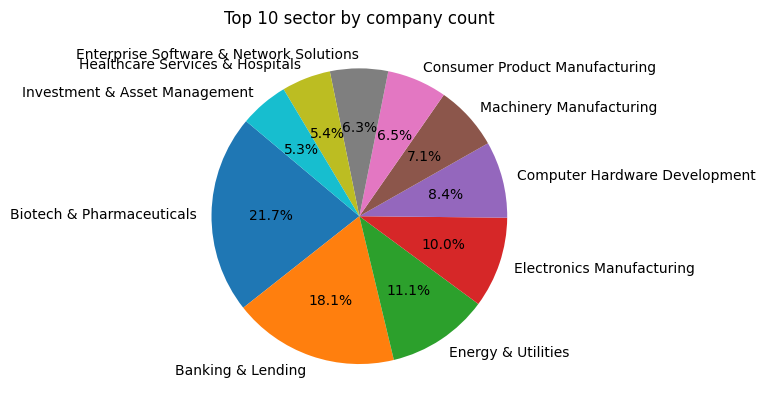

In [5]:
top10_sector = company.groupby('industryName')['glassdoorId'].count().sort_values(ascending=False)[1:11]
labels = top10_sector.index
sizes = top10_sector.values
# explode = (0.1, 0, 0, 0)  
plt.pie(sizes,labels=labels,
        autopct='%1.1f%%', startangle=140)
plt.title("Top 10 sector by company count")
plt.show()

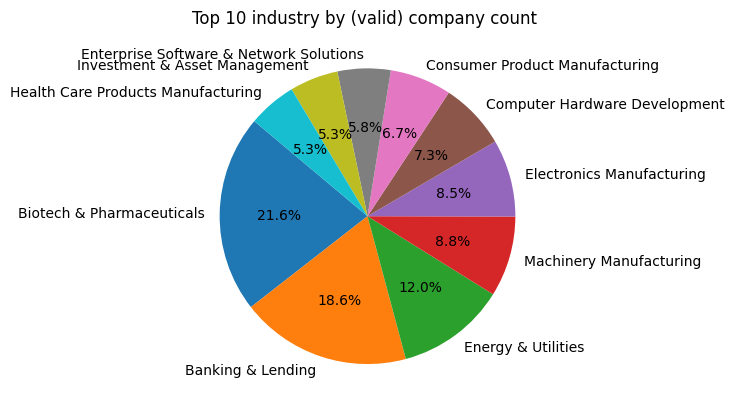

In [28]:
# top 10 counts of valid companies

top10_sector_valid = valid_companies.groupby('industryName')['glassdoorId'].count().sort_values(ascending=False).drop('-')[:10]
labels = top10_sector_valid.index
sizes = top10_sector_valid.values
# explode = (0.1, 0, 0, 0)  
plt.pie(sizes,labels=labels,
        autopct='%1.1f%%', startangle=140)
plt.title("Top 10 industry by (valid) company count ")
plt.show()

In [39]:
company_foundyear = company['yearFounded'].dropna().value_counts().sort_index(ascending=False)
company_foundyear.loc[:2000]

yearFounded
2050.0     1
2021.0     9
2020.0    11
2019.0    20
2018.0    22
2017.0    26
2016.0    36
2015.0    50
2014.0    50
2013.0    46
2012.0    62
2011.0    56
2010.0    56
2009.0    45
2008.0    58
2007.0    63
2006.0    73
2005.0    69
2004.0    77
2003.0    52
2002.0    56
2001.0    64
2000.0    70
Name: count, dtype: int64

[]

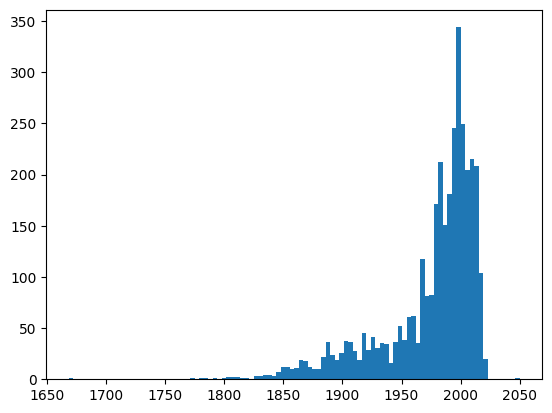

In [25]:
plt.hist(company['yearFounded'], bins=100)
plt.plot()

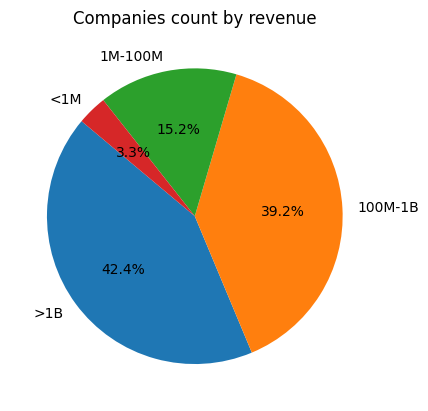

In [71]:
byrevenue = company.groupby('revnue_mapping')['glassdoorId'].count().sort_values(ascending=False)
plt.pie(byrevenue.values,labels=['>1B', '100M-1B', '1M-100M', '<1M'],
        autopct='%1.1f%%', startangle=140)
plt.title("Companies count by revenue")
plt.show()

In [51]:
valid_companies

,compustatName,shortName,website,comType,revenue,headquarters,size,industryName,glassdoorId,yearFounded,reviewCount,revenue_mapping,ticker,city,state/country,country
2,AAON INC,AAON,www.aaon.com,Company - Public,$100 to $500 million (USD),"Tulsa, OK",1001 to 5000 Employees,Machinery Manufacturing,2450,1988.0,112,1.0,AAON,Tulsa,OK,US
3,AAR CORP,AAR,www.aarcorp.com,Company - Public,$1 to $2 billion (USD),"Wood Dale, IL",1001 to 5000 Employees,Aerospace & Defence,4,1951.0,527,0.0,AIR,Wood Dale,IL,US
4,ACCO BRANDS CORP,ACCO Brands,www.accobrands.com,Company - Public,$1 to $2 billion (USD),"Lake Zurich, IL",5001 to 10000 Employees,Consumer Product Manufacturing,13939,1903.0,None,0.0,ACCO,Lake Zurich,IL,US
5,ACNB CORP,ACNB,www.acnb.com,Company - Public,$50 to $100 million (USD),"Gettysburg, PA",201 to 500 Employees,Banking & Lending,6924,1983.0,11,NaN,ACNB,Gettysburg,PA,US
6,ADMA BIOLOGICS INC,ADMA Biologics,www.admabiologics.com,Company - Public,$25 to $50 million (USD),"Ramsey, NJ",201 to 500 Employees,Biotech & Pharmaceuticals,1903632,2004.0,53,NaN,ADMA,Ramsey,NJ,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,ZOOM VIDEO COMUNICATIONS INC,Zoom Video Communications,www.zoom.us,Company - Public,$2 to $5 billion (USD),"San Jose, CA",5001 to 10000 Employees,Information Technology Support Services,924644,2011.0,None,0.0,ZM,San Jose,CA,US
4520,ZOMEDICA CORP,Zomedica,www.zomedica.com,Company - Private,Less than $1 million (USD),"Ann Arbor, MI",1 to 50 Employees,Biotech & Pharmaceuticals,1744920,NaN,None,3.0,ZOM,Ann Arbor,MI,US
4521,ZUMIEZ INC,Zumiez,www.zumiez.com,Company - Public,$500 million to $1 billion (USD),"Everett, WA",5001 to 10000 Employees,"Department, Clothing & Shoe Stores",38024,1978.0,None,1.0,ZUMZ,Everett,WA,US
4526,ZYNEX INC,Zynex Medical,www.zynex.com,Company - Public,Unknown Non-Applicable,"Englewood, CO",501 to 1000 Employees,Health Care Products Manufacturing,635432,1996.0,None,NaN,ZYXI,Englewood,CO,US


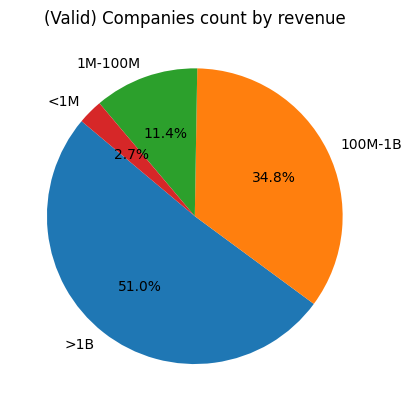

In [52]:
byrevenue = valid_companies.groupby('revenue_mapping')['glassdoorId'].count().sort_values(ascending=False)
plt.pie(byrevenue.values,labels=['>1B', '100M-1B', '1M-100M', '<1M'],
        autopct='%1.1f%%', startangle=140)
plt.title("(Valid) Companies count by revenue")
plt.show()

In [53]:
valid_companies

,compustatName,shortName,website,comType,revenue,headquarters,size,industryName,glassdoorId,yearFounded,reviewCount,revenue_mapping,ticker,city,state/country,country
2,AAON INC,AAON,www.aaon.com,Company - Public,$100 to $500 million (USD),"Tulsa, OK",1001 to 5000 Employees,Machinery Manufacturing,2450,1988.0,112,1.0,AAON,Tulsa,OK,US
3,AAR CORP,AAR,www.aarcorp.com,Company - Public,$1 to $2 billion (USD),"Wood Dale, IL",1001 to 5000 Employees,Aerospace & Defence,4,1951.0,527,0.0,AIR,Wood Dale,IL,US
4,ACCO BRANDS CORP,ACCO Brands,www.accobrands.com,Company - Public,$1 to $2 billion (USD),"Lake Zurich, IL",5001 to 10000 Employees,Consumer Product Manufacturing,13939,1903.0,None,0.0,ACCO,Lake Zurich,IL,US
5,ACNB CORP,ACNB,www.acnb.com,Company - Public,$50 to $100 million (USD),"Gettysburg, PA",201 to 500 Employees,Banking & Lending,6924,1983.0,11,NaN,ACNB,Gettysburg,PA,US
6,ADMA BIOLOGICS INC,ADMA Biologics,www.admabiologics.com,Company - Public,$25 to $50 million (USD),"Ramsey, NJ",201 to 500 Employees,Biotech & Pharmaceuticals,1903632,2004.0,53,NaN,ADMA,Ramsey,NJ,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,ZOOM VIDEO COMUNICATIONS INC,Zoom Video Communications,www.zoom.us,Company - Public,$2 to $5 billion (USD),"San Jose, CA",5001 to 10000 Employees,Information Technology Support Services,924644,2011.0,None,0.0,ZM,San Jose,CA,US
4520,ZOMEDICA CORP,Zomedica,www.zomedica.com,Company - Private,Less than $1 million (USD),"Ann Arbor, MI",1 to 50 Employees,Biotech & Pharmaceuticals,1744920,NaN,None,3.0,ZOM,Ann Arbor,MI,US
4521,ZUMIEZ INC,Zumiez,www.zumiez.com,Company - Public,$500 million to $1 billion (USD),"Everett, WA",5001 to 10000 Employees,"Department, Clothing & Shoe Stores",38024,1978.0,None,1.0,ZUMZ,Everett,WA,US
4526,ZYNEX INC,Zynex Medical,www.zynex.com,Company - Public,Unknown Non-Applicable,"Englewood, CO",501 to 1000 Employees,Health Care Products Manufacturing,635432,1996.0,None,NaN,ZYXI,Englewood,CO,US


In [54]:
byemployment = valid_companies.groupby('size')['glassdoorId'].count().sort_values(ascending=False)
byemployment.drop('Unknown',inplace=True)


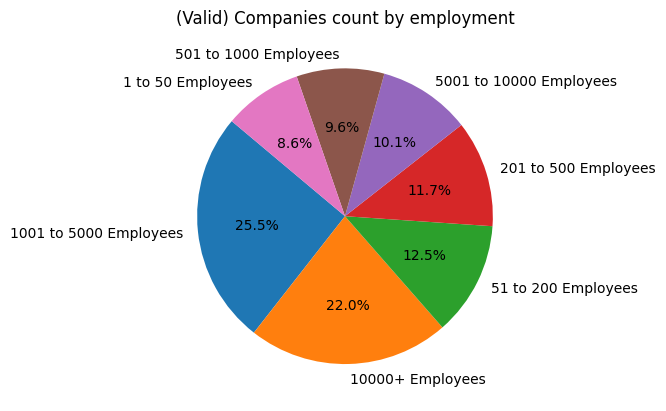

In [58]:
plt.pie(byemployment.values,labels=byemployment.index,
        autopct='%1.1f%%', startangle=140)
plt.title("(Valid) Companies count by employment")
plt.show()

In [18]:
company_sm = company[['stock','industryName','glassdoorId', 'yearFounded', 'revenue_mapping']]

# Glassdoor classification

In [5]:
glassd_classification.columns

Index(['Id', 'dataVendorId', 'reviewId', 'glassdoorId', 'reviewDateTime',
       'reviewDetailUrl', 'isCurrentJob', 'lengthOfEmployment', 'jobtitle_ref',
       'location_ref', 'ratingOverall', 'ratingCareerOpportunities',
       'ratingCompensationAndBenefits', 'ratingCultureAndValues',
       'ratingSeniorLeadership', 'ratingWorkLifeBalance',
       'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
       'ratingRecommendToFriend', 'countHelpful', 'countNotHelpful',
       'updateDateTime'],
      dtype='object')

In [7]:
glassd_classification.head(2)

,Id,dataVendorId,reviewId,glassdoorId,reviewDateTime,reviewDetailUrl,isCurrentJob,lengthOfEmployment,jobtitle_ref,location_ref,...,ratingCultureAndValues,ratingSeniorLeadership,ratingWorkLifeBalance,ratingDiversityAndInclusion,ratingBusinessOutlook,ratingCeo,ratingRecommendToFriend,countHelpful,countNotHelpful,updateDateTime
0,1,037833100804210001,81,1138,2008-04-21 01:00:53,https://www.glassdoor.com/Reviews/Employee-Rev...,1,0,19466.0,1140171.0,...,0,4,5,0,None,APPROVE,POSITIVE,1,1,2023-09-04 04:47:55
1,2,037833100804210002,83,1138,2008-04-21 01:23:22,https://www.glassdoor.com/Reviews/Employee-Rev...,1,0,19466.0,1147311.0,...,0,4,2,0,None,APPROVE,None,0,0,2023-09-04 04:47:55


In [29]:
company_sm = company[['ticker','industryName','glassdoorId', 'yearFounded', 'revenue_mapping']]
company_byreview = glassd_classification.groupby('glassdoorId')['reviewId'].count().sort_values()
company_by_review = pd.merge(company_byreview, company_sm,left_index=True, right_on='glassdoorId').reset_index(drop=True)
company_by_review.rename(columns={'reviewId':'reviewcount'},inplace=True)
company_by_review

,reviewcount,ticker,industryName,glassdoorId,yearFounded,revenue_mapping
0,1,VRUS,Biotech & Pharmaceuticals,38906,NaN,2.0
1,1,NOVB,Banking & Lending,7983,1980.0,NaN
2,1,WBCO,Banking & Lending,8020,1996.0,NaN
3,1,CLBK,-,4960159,NaN,NaN
4,1,IRDM,Electronics Manufacturing,4959357,NaN,NaN
...,...,...,...,...,...,...
4320,65435,SBUX,Restaurants & Cafes,2202,1971.0,0.0
4321,75339,TGT,General Merchandise & Superstores,194,1962.0,0.0
4322,85181,CTSH,Information Technology Support Services,8014,1994.0,0.0
4323,110547,WMT,General Merchandise & Superstores,715,1962.0,0.0


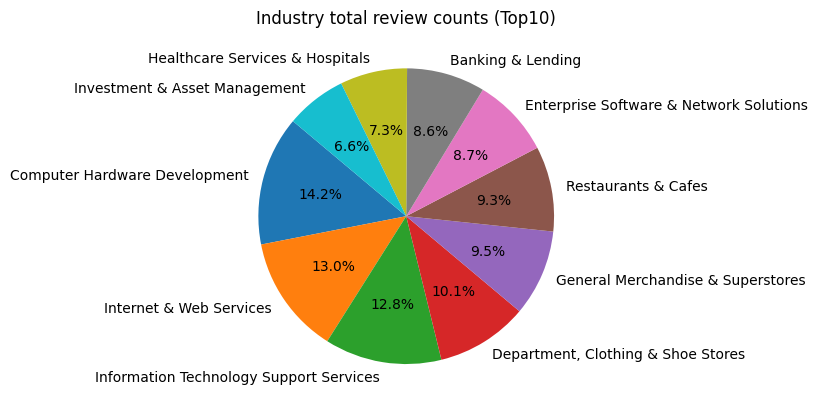

In [30]:
review_count_by_industry = company_by_review.groupby('industryName')['reviewcount'].sum().sort_values(ascending=False)

value = review_count_by_industry.values[:10]
labels = review_count_by_industry.index[:10]
plt.pie(value,labels=labels,
        autopct='%1.1f%%', startangle=140)
plt.title("Industry total review counts (Top10)")
plt.show()

In [33]:
review_count_by_industry

industryName
Computer Hardware Development              320469
Internet & Web Services                    292949
Information Technology Support Services    289088
Department, Clothing & Shoe Stores         227186
General Merchandise & Superstores          213662
                                            ...  
Real Estate Agencies                          190
Biotechnology                                 163
Crop Production                               131
Staffing, Recruitment & Subcontracting         90
Travel Agencies                                26
Name: reviewcount, Length: 94, dtype: int64

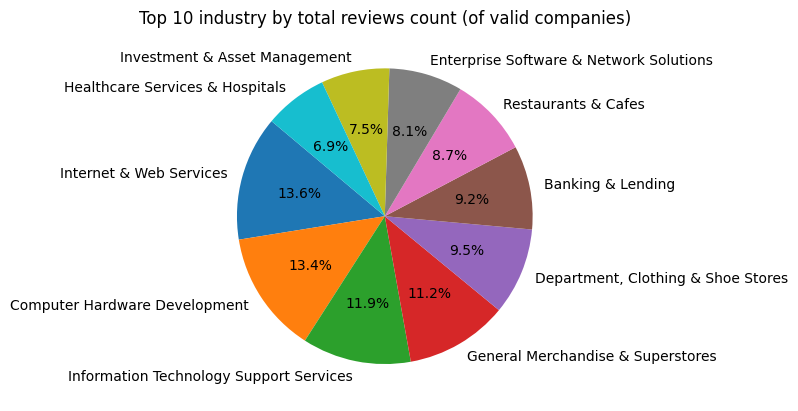

In [43]:
valid_review_count_by_industry = company_by_review[company_by_review['ticker'].isin(stock_monthly['ticker'].unique())].groupby('industryName')['reviewcount'].sum().sort_values(ascending=False)

value = valid_review_count_by_industry.values[:10]
labels = valid_review_count_by_industry.index[:10]
plt.pie(value,labels=labels,
        autopct='%1.1f%%', startangle=140)
plt.title("Top 10 industry by total reviews count (of valid companies)")
plt.show()

In [45]:
company_by_review[company_by_review['industryName'].isin(valid_review_count_by_industry.index[:10])]

,reviewcount,ticker,industryName,glassdoorId,yearFounded,revenue_mapping
1,1,NOVB,Banking & Lending,7983,1980.0,NaN
2,1,WBCO,Banking & Lending,8020,1996.0,NaN
12,1,MSVB,Banking & Lending,34880,NaN,2.0
21,1,HVB,Banking & Lending,22220,1982.0,1.0
22,1,HWBK,Banking & Lending,12145,1992.0,NaN
...,...,...,...,...,...,...
4320,65435,SBUX,Restaurants & Cafes,2202,1971.0,0.0
4321,75339,TGT,General Merchandise & Superstores,194,1962.0,0.0
4322,85181,CTSH,Information Technology Support Services,8014,1994.0,0.0
4323,110547,WMT,General Merchandise & Superstores,715,1962.0,0.0


In [37]:
# simple cleaning
# company2 = pd.merge(company, company_by_review[['ticker','reviewcount']], on='ticker')
# company2.drop('reviewCount',axis=1,inplace=True)
# company2.to_parquet('/home/group3/group3/Finalized/data/company_overview_cleaned.parquet')